# Forcing fields

This notebooks serves to show the different forced fields used by the models. In particular ERA40/JRA25 and the averaged versions together with the CORE2 forcing

In [1]:
from scipy.io import netcdf
import numpy as np
from pylab import clf, plot, show, floor, ceil, imshow
import matplotlib
import matplotlib.pyplot as plt 
%matplotlib inline
#xlabel, ylabel, legend, savefig, colorbar, title, clim, pcolor, cm, contourf
import os
import csv
import sys
import glob
from netCDF4 import Dataset

from IPython.display import display, Math, Latex, Image
from mpl_toolkits.basemap import Basemap
import mpl_toolkits

sys.path.append('/noc/users/am8e13/PyNGL-1.4.0/lib/python2.7/site-packages/PyNGL/')
import Ngl
sys.path.append('/noc/users/am8e13/Python/')
import komod
sys.path.append('/noc/users/am8e13/Python/PyNIO-1.4.0/')
import Nio

from python_functions import *
import cmocean
import random
import calendar

from IPython.html.widgets import interact, interactive
from IPython.display import clear_output, display, HTML

Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 30 days
:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [2]:
NCEP = read_forcing('/scratch/general/am8e13/NCEP_data/','cube78_',1992,16)   
ERA = read_forcing('/scratch/general/am8e13/forcing/ERA_data/','ERA40g_',1979,23)
JRA = read_forcing('/scratch/general/am8e13/forcing/JRA_data/','jra25_',1979,24)
CORE2,time_core = read_core('/scratch/general/am8e13/forcing/CORE2_data/')
titles, unity = dataset_unity()

read cube78_
read ERA40g_
read jra25_
read CORE2


In [36]:
time_core['spfh2m'][0:40000:20]

array([ 0.        ,  0.0136612 ,  0.0273224 ,  0.04098361,  0.05464481,
        0.06830601,  0.08196721,  0.09562842,  0.10928962,  0.12295082,
        0.13661202,  0.15027322,  0.16393443,  0.17759563,  0.19125683,
        0.20491803,  0.21857923,  0.23224044,  0.24590164,  0.25956284,
        0.27322404,  0.28688525,  0.30054645,  0.31420765,  0.32786885,
        0.34153005,  0.35519126,  0.36885246,  0.38251366,  0.39617486,
        0.40983607,  0.42349727,  0.43715847,  0.45081967,  0.46448087,
        0.47814208,  0.49180328,  0.50546448,  0.51912568,  0.53278689,
        0.54644809,  0.56010929,  0.57377049,  0.58743169,  0.6010929 ,
        0.6147541 ,  0.6284153 ,  0.6420765 ,  0.6557377 ,  0.66939891,
        0.68306011,  0.69672131,  0.71038251,  0.72404372,  0.73770492,
        0.75136612,  0.76502732,  0.77868852,  0.79234973,  0.80601093,
        0.81967213,  0.83333333,  0.84699454,  0.86065574,  0.87431694,
        0.88797814,  0.90163934,  0.91530055,  0.92896175,  0.94

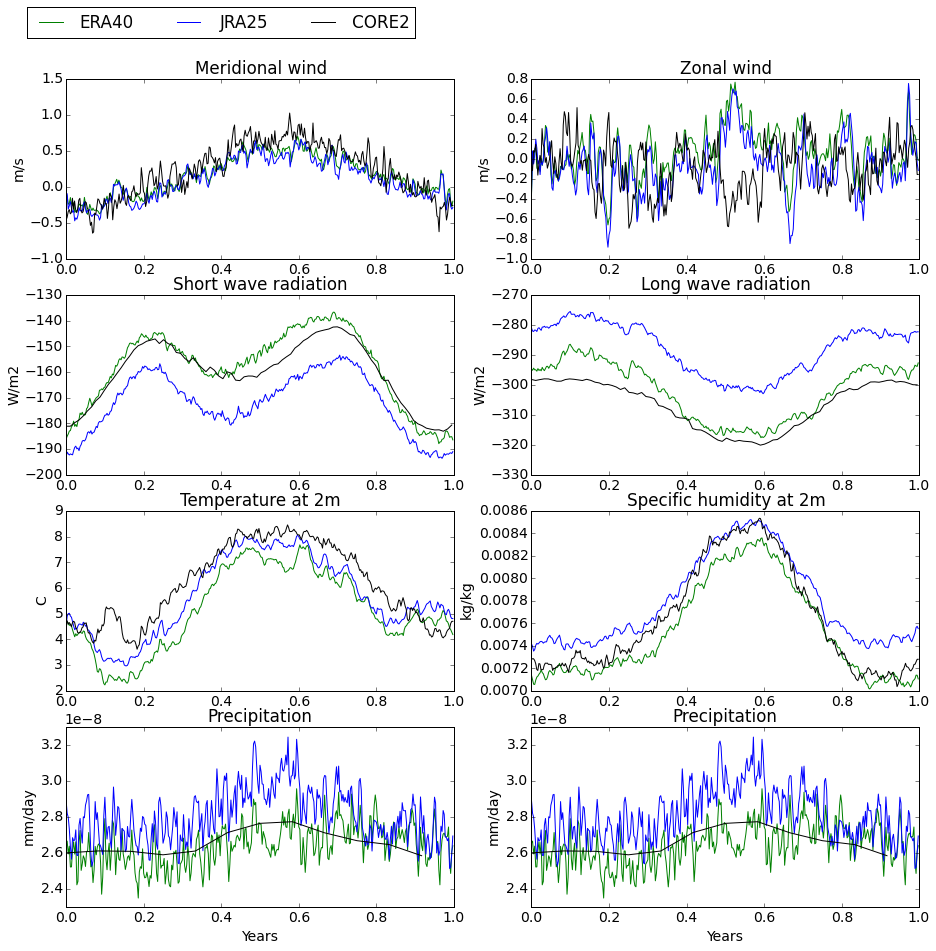

In [39]:
fig, axes = plt.subplots(4,2)
yp = 1
ax_ind = 0
ord_var = ['v10m','u10m','dsw','dlw','tmp2m_degC','spfh2m','rain','rain']
time = np.array(range(len(ERA['data']['v10m'])))/360.

for var in ord_var:
    if var == 'rain' or var == 'rain_new33':
        axes.flat[ax_ind].set_xlabel('Years')
    if var == 'rain_ne3':
        var='Et'
    else:        
        axes.flat[ax_ind].plot(time[0:360*yp],ERA['data'][var][0:360*yp],'green',label='ERA40')
        axes.flat[ax_ind].plot(time[0:360*yp],JRA['data'][var][0:360*yp],'blue',label='JRA25')
        #axes.flat[ax_ind].plot(time[0:360*yp],ERA['data_ave'][var][0:360*yp],'red', label = 'ERA40 ave')
        #axes.flat[ax_ind].plot(time[0:360*yp],JRA['data_ave'][var][0:360*yp],'purple', label = 'JRA25 ave')
        if var == 'rain':
            axes.flat[ax_ind].plot(time_core[var],CORE2['data_ave'][var],'black', label = 'CORE2')
        else:
            axes.flat[ax_ind].plot(time_core[var][0:-1:4],CORE2['data_ave'][var][0:-1:4],'black', label = 'CORE2')
        axes.flat[ax_ind].set_title(titles[var])
        axes.flat[ax_ind].set_ylabel(unity[var])
        ax_ind +=  1
    #yp = 4
plt.legend(bbox_to_anchor=(-1.3, 3.5, 1., 1.5),ncol=4, mode="expand", borderaxespad=0.)
fig.subplots_adjust(right=2.1,top=3)

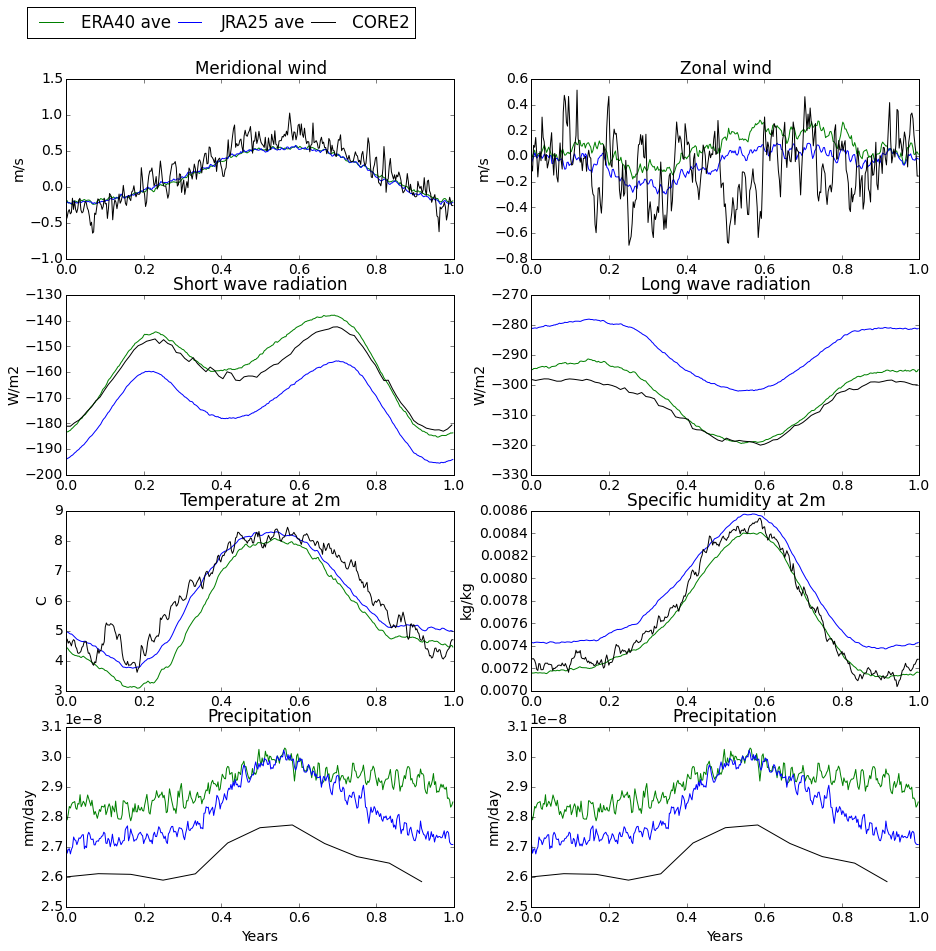

In [41]:
fig, axes = plt.subplots(4,2)
yp = 1
ax_ind = 0
ord_var = ['v10m','u10m','dsw','dlw','tmp2m_degC','spfh2m','rain','rain']
time = np.array(range(len(ERA['data']['v10m'])))/360.

for var in ord_var:
    if var == 'rain' or var == 'rain_new33':
        axes.flat[ax_ind].set_xlabel('Years')
    if var == 'rain_ne3':
        var='Et'
    else:        
        #axes.flat[ax_ind].plot(time[0:360*yp],ERA['data'][var][0:360*yp],'green',label='ERA40')
        #axes.flat[ax_ind].plot(time[0:360*yp],JRA['data'][var][0:360*yp],'blue',label='JRA25')
        axes.flat[ax_ind].plot(time[0:360*yp],ERA['data_ave'][var][0:360*yp],'green', label = 'ERA40 ave')
        axes.flat[ax_ind].plot(time[0:360*yp],JRA['data_ave'][var][0:360*yp],'blue', label = 'JRA25 ave')
        if var == 'rain':
            axes.flat[ax_ind].plot(time_core[var],CORE2['data_ave'][var],'black', label = 'CORE2')
        else:
            axes.flat[ax_ind].plot(time_core[var][0:-1:4],CORE2['data_ave'][var][0:-1:4],'black', label = 'CORE2')
        axes.flat[ax_ind].set_title(titles[var])
        axes.flat[ax_ind].set_ylabel(unity[var])
        ax_ind +=  1
    #yp = 4
plt.legend(bbox_to_anchor=(-1.3, 3.5, 1., 1.5),ncol=4, mode="expand", borderaxespad=0.)
fig.subplots_adjust(right=2.1,top=3)

ERA in grey with average in red
JRA in blue with average in yellow
NCEP in green with average in orange


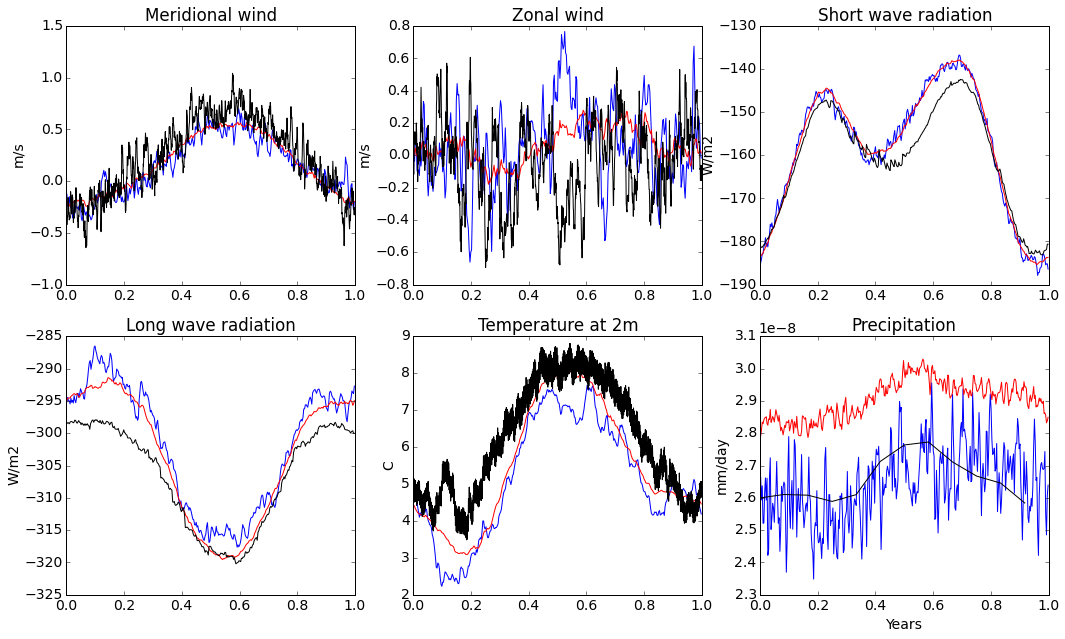

In [4]:
fig, axes = plt.subplots(2,3)
yp =1
ax_ind = 0
ord_var = ['v10m','u10m','dsw','dlw','tmp2m_degC','rain']
time = np.array(range(len(ERA['data']['v10m'])))/360.

for var in ord_var:
    if var == 'rain' or var == 'rain_new33':
        axes.flat[ax_ind].set_xlabel('Years')
    if var == 'rain_ne3':
        var='Et'
    else:        
        axes.flat[ax_ind].plot(time[0:360*yp],ERA['data'][var][0:360*yp],'blue')
        #axes.flat[ax_ind].plot(time[0:360*yp],JRA['data'][var][0:360*yp],'blue')
        #axes.flat[ax_ind].plot(time[0:360*yp],NCEP['data'][var][0:360*yp],'green')
        axes.flat[ax_ind].plot(time[0:360*yp],ERA['data_ave'][var][0:360*yp],'red')
        #axes.flat[ax_ind].plot(time[0:360*yp],JRA['data_ave'][var][0:360*yp],'purple')
        #axes.flat[ax_ind].plot(time[0:360*yp],NCEP['data_ave'][var][0:360*yp],'orange')
        axes.flat[ax_ind].plot(time_core[var],CORE2['data_ave'][var],'black')
        axes.flat[ax_ind].set_title(titles[var])
        axes.flat[ax_ind].set_ylabel(unity[var])
        ax_ind +=  1
    #yp = 4

print 'ERA in grey with average in red'
print 'JRA in blue with average in yellow'
print 'NCEP in green with average in orange'
fig.subplots_adjust(right=2.4,top=2.1)